## Dhir Thacker | 17070122019 (C1)
## Lab Assignment 4 : Data cleaning

### 1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [2]:
df = pd.read_csv("911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 2) A brief understanding of data


In [3]:
df.shape

(99492, 9)

In [4]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
len(df.columns)

9

In [6]:
df.describe()
# representation of all numerical columns

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [7]:
categorical = df.dtypes[df.dtypes == object].index
# printing index of all categorical data & describing stats
df[categorical].describe()

,desc,title,timeStamp,twp,addr
count,99492,99492,99492,99449,98973
unique,99455,110,72577,68,21914
top,GREEN ST & E BASIN ST; NORRISTOWN; Station 30...,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,4,23066,8,8443,938


### 3) NULL VALUES

#### (a) Checking the presence of null values in the dataset

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [11]:
df.dtypes
# Checking datatypes each column consists before filling null values 

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

#### (b) Filling null values (forward filling)

In [12]:
columns = ["zip", "twp", "addr"]

In [13]:
df.loc[:, columns] = df.loc[:, columns].ffill() 
# Fill null values from last valid observation

In [14]:
df.isnull().sum()
# cross-checking whether null values still persist

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

### 4) The target column 'e'

In [15]:
df.e.unique()

array([1], dtype=int64)

In [16]:
df.drop("e", axis=1, inplace=True)
# df["e"] contains only one numerical variable, hence, 
# we will drop it as it is not helping in analysing data more precisely

In [17]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

In [18]:
len(df.columns)

8

### 5) Data manipulation


####        (A) PART - 1


In [19]:
type(df["timeStamp"].loc[0])

str

In [20]:
# Converting time to datetime format
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
type(df["timeStamp"].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df["timeStamp"].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

###### (a) Extracting day of week and mapping into day's name format


In [23]:
df["Day"] = pd.to_datetime(df["timeStamp"]).dt.dayofweek
df["Day"].unique()   

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

###### (b) Setting days of week from numeric to actual days of week

In [24]:
df["Day"] = df["Day"].map({0:"Sunday", 1:"Monday", 2:"Tuesday",
                          3:"Wednesday", 4:"Thursday", 5:"Friday",
                           6:"Saturday"})

In [25]:
df["Day"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

###### (c) Extracting hour, month, year and date


In [26]:
df["Month"] = df["timeStamp"].dt.month
df["Month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [27]:
df["Month"] = df["Month"].map({1:"January", 2:"February", 3:"March",
                              4:"April", 5:"May", 6:"June", 7:"July",
                              8:"August", 9:"September", 10:"October",
                              11:"November", 12:"December"
                              })

In [28]:
# Extracting hour from timeStamp
df["Hours"] = df["timeStamp"].dt.hour

In [29]:
# Extracting year from timeStamp
df["Year"] = df["timeStamp"].dt.year

In [30]:
# Extracting date from timeStamp
df["Date"] = df["timeStamp"].dt.date

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Day,Month,Hours,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,Wednesday,December,17,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,Wednesday,December,17,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Wednesday,December,17,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,Wednesday,December,17,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,Wednesday,December,17,2015,2015-12-10


#### (B) PART - 2

###### (a) Splitting title column into two : category and reason


In [33]:
df["category"] = df["title"].str.split(":", expand=True)[0]
# [0] is the 0th index of list after splitting
df["reason"] = df["title"].str.split(":", expand=True)[1]
# [1] is the 1st index of list after splitting

In [34]:
# Dropping title column after splitting into reason and category
df.drop("title", axis=1, inplace=True)

In [39]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'timeStamp', 'twp', 'addr', 'Day', 'Month',
       'Hours', 'Year', 'Date', 'category', 'reason'],
      dtype='object')

###### (b) extracting station code from desc

In [ ]:
# desc contains address, township and station code out of which we only
# need station code
df["Station_code"] = df["desc"].str.split("Station", expand=True)[1]
df["Station_code"] = df["Station_code"].str.split(":", expand=True)
df["Station_code"] = df["Station_code"].str.replace(":", " ")
# Now dropping the desc column
df.drop("desc", axis=1, inplace=True)

In [48]:
df.columns

Index(['lat', 'lng', 'zip', 'timeStamp', 'twp', 'addr', 'Day', 'Month',
       'Hours', 'Year', 'Date', 'category', 'reason', 'Station_code'],
      dtype='object')

###### (c) Now we extracted all information from timestamp and it is no longer needed

In [51]:
df.drop("timeStamp", axis=1, inplace=True)

### 6) Exploratory Data analysis

#### (a) Which reason is responsible for highest number of emergency calls? 

In [52]:
df["reason"].value_counts().keys()[0]

' VEHICLE ACCIDENT -'

#### (b) Township (twp) with the most number of emergency calls

In [53]:
df.twp.value_counts().head().keys()[0]

'LOWER MERION'

#### (c) Top 5 accidents happened to LOWER MERION

In [55]:
df[df["twp"] == "LOWER MERION"]["reason"].value_counts().head()

 VEHICLE ACCIDENT -    2324
 DISABLED VEHICLE -     787
 FIRE ALARM             772
 VEHICLE ACCIDENT       464
 ROAD OBSTRUCTION -     406
Name: reason, dtype: int64

###### Here we can observe all the top accidents happend because of human mistakes 
###### Conclusion : LOWER MERION has less number of medical emergency cases.

#### (d) Top 5 months with the highest number of emmergency calls

In [70]:
df["Month"].value_counts().head()

January     13205
July        12137
June        11786
February    11467
May         11423
Name: Month, dtype: int64

#### (e) Contribution of various category of emergency over hour

C:\Users\DHEER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


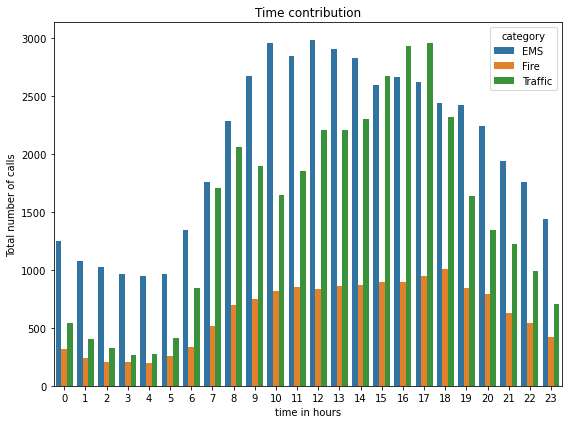

In [89]:
plt.figure(figsize=(8,6))
sns.countplot(df["Hours"],hue=df["category"],data=df)
plt.xlabel("time in hours")
plt.ylabel("Total number of calls")
plt.title("Time contribution")
plt.tight_layout()

###### Here we can easily conclude that Medical Emergency(EMS) has been responsible for maximum number of emergency between 11:00 -12:00 hrs.

#### (f) Yearly variation of emergency calls

C:\Users\DHEER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


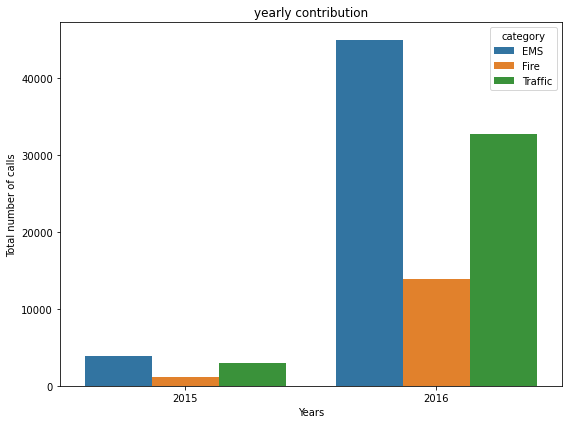

In [90]:
plt.figure(figsize=(8,6))
sns.countplot(df["Year"],hue=df["category"],data=df)
plt.xlabel("Years")
plt.ylabel("Total number of calls")
plt.title("yearly contribution")
plt.tight_layout()

###### In 2016 people have adopted emergency call service more and more as compared to 2015, and there was tremendous rise in EMS has been seen .We can finally conclude that there was humongous spike in accdident has been observed in 2016.

#### (g) Heatmap Day vs Time

<AxesSubplot:xlabel='Hours', ylabel='Day'>

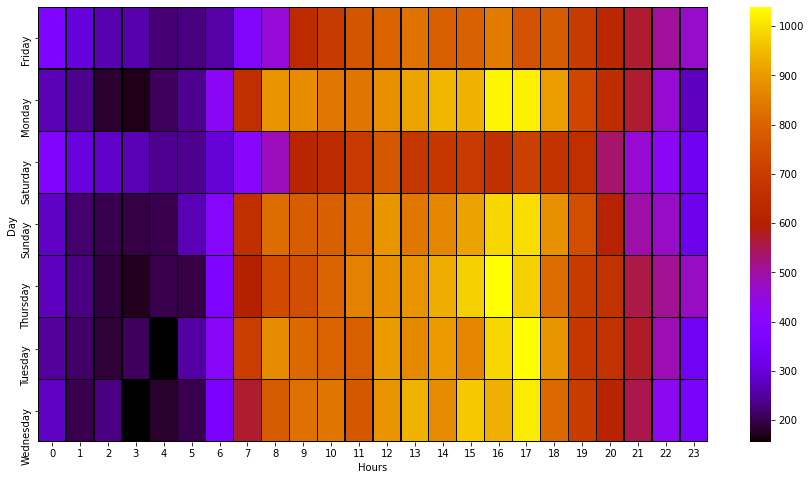

In [91]:
Day_hour=df.groupby([df.Day,df.Hours]).count().category.unstack() 
"""Here multiindex object has been arranged into dataframe based on column label"""
plt.figure(figsize=(15,8))
sns.heatmap(Day_hour, linewidth=0.3, linecolor="black", cmap="gnuplot")

###### Here we can see on monday in between 3pm-5pm most number of call has been dialed.

#### (i) Heatmap Day vs Month

<AxesSubplot:xlabel='Hours', ylabel='Day'>

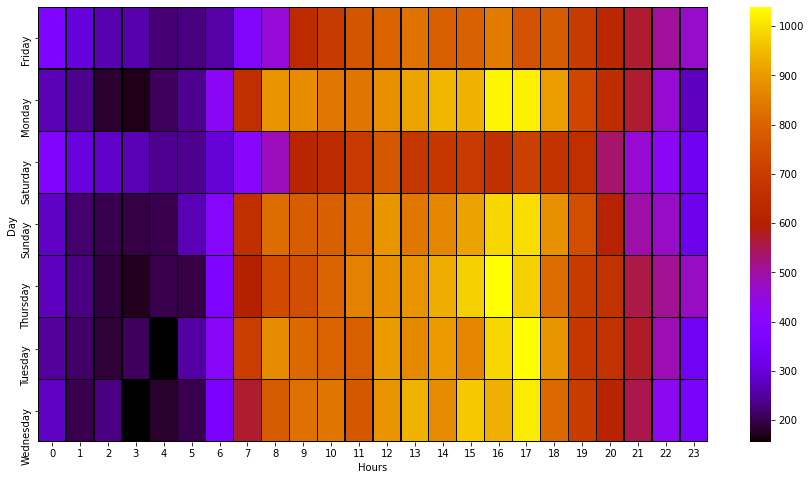

In [92]:
Day_month=df.groupby([df.Day, df.Hours]).count().category.unstack()
plt.figure(figsize=(15,8))
sns.heatmap(Day_month,linewidth=0.3,linecolor="black",cmap='gnuplot')

###### Here by observing heatmap we can conclude that in january month at friday maximum number of call has been dailed.

#### (j) Counting calls every month based on categoty of emergency

<AxesSubplot:xlabel='Month'>

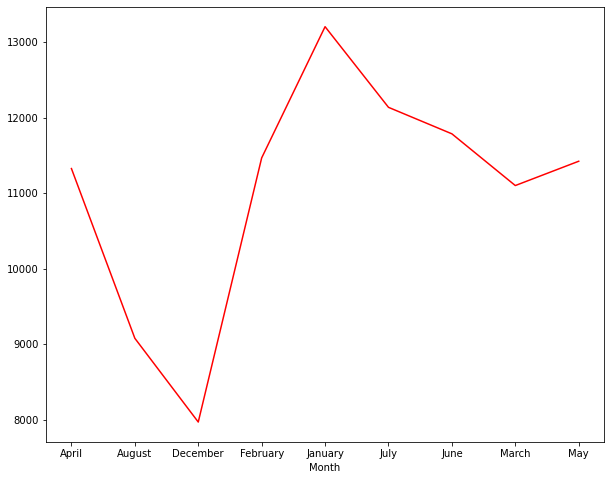

In [93]:
month=df.groupby("Month").count()["category"]
month.plot(figsize=(10,8),color="red")

###### In January, maximum number of emergency calls were attempted.